In [1]:
import ast 
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_da_us = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

C:\Users\user\AppData\Local\Temp\ipykernel_1696\2076368787.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


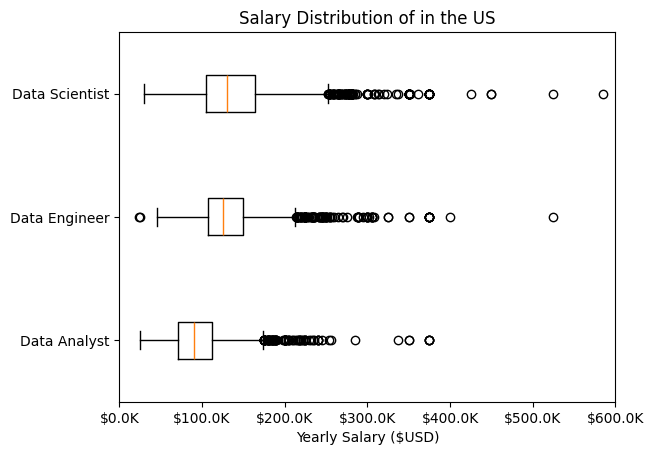

In [3]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])
job_list = [df_us[df_us['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution of in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))
plt.xlim(0, 600000)
plt.show()